In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime
import yfinance as yf

In [3]:
pd.set_option('display.max_rows', 100)

In [5]:
acs_df=pd.read_csv('../data/acs_5yr_merged.csv')
zillow_df=pd.read_csv('../data/Zip_Zri_AllHomesPlusMultifamily.csv')

In [359]:
county_to_zip_df = pd.read_excel('../../data/COUNTY_ZIP_062021.xlsx',
                                 index_col=None,
                                 dtype= {'county': str, 'zip': str})  

In [360]:
county_to_zip_df

,county,zip,usps_zip_pref_city,usps_zip_pref_state,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,01001,36749,JONES,AL,0.014102,0.001453,0.014000,0.013273
1,01001,36068,PRATTVILLE,AL,0.045580,0.187893,0.004000,0.054230
2,01001,36067,PRATTVILLE,AL,0.455041,0.484746,0.340000,0.455162
3,01001,36008,BOOTH,AL,0.001034,0.001937,0.000000,0.001077
4,01001,36022,DEATSVILLE,AL,0.080816,0.014044,0.014000,0.075390
...,...,...,...,...,...,...,...,...
54207,78010,00850,KINGSHILL,VI,0.213934,0.151045,0.004808,0.188806
54208,78010,00840,FREDERIKSTED,VI,0.323914,0.201154,0.291346,0.299910
54209,78010,00820,CHRISTIANSTED,VI,0.462152,0.647801,0.703846,0.511283
54210,78020,00830,ST JOHN,VI,1.000000,1.000000,1.000000,1.000000


In [7]:
print(acs_df.columns.tolist())

['geo_id', 'do_date', 'nonfamily_households', 'family_households', 'median_year_structure_built', 'rent_burden_not_computed', 'rent_over_50_percent', 'rent_40_to_50_percent', 'rent_35_to_40_percent', 'rent_30_to_35_percent', 'rent_25_to_30_percent', 'rent_20_to_25_percent', 'rent_15_to_20_percent', 'rent_10_to_15_percent', 'rent_under_10_percent', 'total_pop', 'male_pop', 'female_pop', 'median_age', 'white_pop', 'black_pop', 'asian_pop', 'hispanic_pop', 'amerindian_pop', 'other_race_pop', 'two_or_more_races_pop', 'not_hispanic_pop', 'commuters_by_public_transportation', 'households', 'median_income', 'income_per_capita', 'housing_units', 'vacant_housing_units', 'vacant_housing_units_for_rent', 'vacant_housing_units_for_sale', 'median_rent', 'percent_income_spent_on_rent', 'owner_occupied_housing_units', 'million_dollar_housing_units', 'mortgaged_housing_units', 'families_with_young_children', 'two_parent_families_with_young_children', 'two_parents_in_labor_force_families_with_young_chi

In [12]:
acs_df[['geo_id', 'do_date', 'income_less_10000', 'income_10000_14999', 
        'income_15000_19999', 'income_20000_24999', 'income_25000_29999', 
        'income_30000_34999', 'income_35000_39999', 'income_40000_44999', 
        'income_45000_49999', 'income_50000_59999', 'income_60000_74999', 
        'income_75000_99999', 'income_100000_124999', 'income_125000_149999', 
        'income_150000_199999', 'income_200000_or_more']]

,geo_id,do_date,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more
0,601,20072011,2232.0,589.0,408.0,422.0,302.0,278.0,219.0,185.0,162.0,134.0,113.0,122.0,9.0,6.0,12.0,17.0
1,601,20082012,2351.0,585.0,455.0,381.0,333.0,274.0,281.0,126.0,149.0,208.0,121.0,156.0,14.0,5.0,24.0,14.0
2,601,20092013,2659.0,613.0,471.0,374.0,353.0,210.0,274.0,140.0,74.0,233.0,133.0,140.0,39.0,21.0,23.0,23.0
3,601,20102014,2797.0,684.0,407.0,343.0,262.0,263.0,252.0,125.0,113.0,232.0,137.0,102.0,40.0,20.0,20.0,23.0
4,601,20112015,2873.0,716.0,448.0,318.0,262.0,252.0,266.0,118.0,135.0,231.0,138.0,86.0,59.0,22.0,20.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264955,99929,20102014,57.0,89.0,56.0,96.0,55.0,42.0,39.0,101.0,72.0,111.0,101.0,134.0,53.0,41.0,82.0,20.0
264956,99929,20112015,57.0,77.0,54.0,105.0,66.0,44.0,43.0,75.0,51.0,89.0,107.0,152.0,90.0,30.0,43.0,33.0
264957,99929,20122016,38.0,52.0,45.0,112.0,47.0,35.0,48.0,69.0,47.0,110.0,97.0,115.0,106.0,43.0,48.0,25.0
264958,99929,20132017,41.0,53.0,49.0,88.0,76.0,33.0,51.0,54.0,21.0,119.0,107.0,135.0,113.0,76.0,39.0,20.0


In [332]:
zri_df=pd.read_csv('../data/Zip_Zri_AllHomesPlusMultifamily.csv')
zri_df=zri_df.reset_index()
zri_df_tmp=zri_df.drop(['RegionID','RegionName','City','State','Metro','CountyName','SizeRank'],axis=1)
zri_df_pivot=pd.DataFrame(zhi_df_tmp.stack())
zri_df_pivot=zri_df_pivot[1:].reset_index()
zri_df_pivot.columns=['index','Date','Value']
zri_reshaped=zri_df_pivot.merge(zhi_df[['index','RegionID','RegionName','City','State','Metro','CountyName','SizeRank']],on='index')
zri_reshaped=zri_reshaped.drop('index',axis=1)

In [333]:
zri_reshaped.dtypes

Date           object
Value         float64
RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
dtype: object

In [334]:
len(zri_reshaped.Metro.unique())

774

In [335]:
zri_reshaped.Metro.unique()

array(['New York-Newark-Jersey City', 'Chicago-Naperville-Elgin',
       'Houston-The Woodlands-Sugar Land', 'El Paso', 'Austin-Round Rock',
       'San Francisco-Oakland-Hayward',
       'Nashville-Davidson--Murfreesboro--Franklin',
       'Los Angeles-Long Beach-Anaheim', 'San Antonio-New Braunfels',
       'Washington-Arlington-Alexandria', 'Charlotte-Concord-Gastonia',
       'McAllen-Edinburg-Mission', 'Atlanta-Sandy Springs-Roswell',
       'Dallas-Fort Worth-Arlington', 'Clarksville', 'Oklahoma City',
       'St. Louis', 'Seattle-Tacoma-Bellevue', 'Phoenix-Mesa-Scottsdale',
       'Baltimore-Columbia-Towson',
       'Miami-Fort Lauderdale-West Palm Beach',
       'Virginia Beach-Norfolk-Newport News', 'Orlando-Kissimmee-Sanford',
       'Brownsville-Harlingen', 'Boston-Cambridge-Newton',
       'Denver-Aurora-Lakewood', 'Sacramento--Roseville--Arden-Arcade',
       'Ann Arbor', 'Cleveland-Elyria', 'Kansas City', 'Tucson',
       'Philadelphia-Camden-Wilmington',
       'Riversid

In [336]:
zipcodes = zri_reshaped['RegionName'].unique().sort()

In [171]:
zipcodes

array([ 1001,  1002,  1005, ..., 99712, 99801, 99901])

In [337]:
income_zip_df_og=pd.read_csv('../../data/CAINC4/CAINC4__ALL_AREAS_1969_2019.csv', low_memory=False)

In [338]:
income_zip_df_og.head()
print(income_zip_df_og.columns.tolist())

['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode', 'IndustryClassification', 'Description', 'Unit', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [339]:
income_zip_df = income_zip_df_og[['GeoFIPS', 'GeoName', 'Region', 'Description', 
             'Unit', '2010', '2011', '2012', '2013', '2014', 
             '2015', '2016', '2017', '2018', '2019']]

In [340]:
income_zip_df['GeoName'].unique().shape

(3199,)

In [341]:
income_zip_df.drop(income_zip_df.index[73370:73558], inplace=True)

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [342]:
income_zip_df.drop(income_zip_df.index[0:23], inplace=True)

In [344]:
income_zip_df

,GeoFIPS,GeoName,Region,Description,Unit,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
23,"""01000""",Alabama,5,Personal income (thousands of dollars),Thousands of dollars,161516561,167942757,172804075,174415420,180457683,188711443,192281933,199999756,208752683,216449038
24,"""01000""",Alabama,5,Nonfarm personal income 1/,Thousands of dollars,160757421,167577167,172128881,172416823,179092659,187186042,191462461,198763455,207660297,215863151
25,"""01000""",Alabama,5,Farm income 2/,Thousands of dollars,759140,365590,675194,1998597,1365024,1525401,819472,1236301,1092386,585887
26,"""01000""",Alabama,5,Population (persons) 3/,Number of persons,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
27,"""01000""",Alabama,5,Per capita personal income (dollars) 4/,Dollars,33752,34995,35884,36110,37271,38891,39536,41030,42710,44145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73365,"""56045""","Weston, WY",7,Farm proprietors' income,Thousands of dollars,-3023,1139,-1950,-1930,6988,3265,-1925,-3480,-4286,-3865
73366,"""56045""","Weston, WY",7,Nonfarm proprietors' income,Thousands of dollars,22027,19138,21060,30002,36277,42928,28804,16330,19653,19616
73367,"""56045""","Weston, WY",7,Total employment,Number of jobs,3893,3774,3925,3918,4087,4090,4045,3942,3881,3976
73368,"""56045""","Weston, WY",7,Wage and salary employment,Number of jobs,2521,2471,2518,2537,2561,2561,2519,2438,2482,2564


In [343]:
type(income_zip_df['GeoFIPS'][23])

str

In [271]:
income_zip_df.Description.unique()

array(['Personal income (thousands of dollars)',
       ' Nonfarm personal income 1/', ' Farm income 2/',
       'Population (persons) 3/',
       'Per capita personal income (dollars) 4/',
       'Earnings by place of work',
       'Less: Contributions for government social insurance 5/',
       ' Employee and self-employed contributions for government social insurance',
       ' Employer contributions for government social insurance',
       'Plus: Adjustment for residence 6/',
       'Equals: Net earnings by place of residence',
       'Plus: Dividends, interest, and rent 7/',
       'Plus: Personal current transfer receipts', 'Wages and salaries',
       'Supplements to wages and salaries',
       ' Employer contributions for employee pension and insurance funds 8/',
       "Proprietors' income 9/", " Farm proprietors' income",
       " Nonfarm proprietors' income", 'Total employment',
       ' Wage and salary employment', ' Proprietors employment'],
      dtype=object)

In [345]:
income_zip_df['GeoFIPS'] = income_zip_df['GeoFIPS'].str.replace('"', '')
income_zip_df['GeoFIPS'] = income_zip_df['GeoFIPS'].str.replace(' ', '')

<ipython-input-345-c3df645f7d62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_zip_df['GeoFIPS'] = income_zip_df['GeoFIPS'].str.replace('"', '')
<ipython-input-345-c3df645f7d62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_zip_df['GeoFIPS'] = income_zip_df['GeoFIPS'].str.replace(' ', '')


In [290]:
UniqueDesc = income_zip_df.Description.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueDesc}

for key in DataFrameDict.keys():
    DataFrameDict[key] = income_zip_df[:][income_zip_df.Description == key]
    
DataFrameDict['Personal income (thousands of dollars)']

,GeoFIPS,GeoName,Region,Description,Unit,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
23,01000,Alabama,5,Personal income (thousands of dollars),Thousands of dollars,161516561,167942757,172804075,174415420,180457683,188711443,192281933,199999756,208752683,216449038
46,01001,"Autauga, AL",5,Personal income (thousands of dollars),Thousands of dollars,1826597,1896347,1927064,1944878,2019288,2131416,2203281,2276561,2360366,2453617
69,01003,"Baldwin, AL",5,Personal income (thousands of dollars),Thousands of dollars,6618292,7067055,7274734,7448839,7887975,8444952,8956578,9471242,10065966,10600260
92,01005,"Barbour, AL",5,Personal income (thousands of dollars),Thousands of dollars,758882,770008,766319,810596,799273,838910,824046,838184,872189,882834
115,01007,"Bibb, AL",5,Personal income (thousands of dollars),Thousands of dollars,573063,591212,612965,617469,636547,655587,654451,662652,683509,710451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73255,56037,"Sweetwater, WY",7,Personal income (thousands of dollars),Thousands of dollars,1878970,2063034,2137347,2153594,2208283,2212397,2099942,2205395,2372270,2423098
73278,56039,"Teton, WY",7,Personal income (thousands of dollars),Thousands of dollars,3024099,3233263,4174883,3927393,4558798,4536902,4782554,5318359,5355156,5392611
73301,56041,"Uinta, WY",7,Personal income (thousands of dollars),Thousands of dollars,812553,831496,839343,818006,817730,811398,780347,784264,820311,847702
73324,56043,"Washakie, WY",7,Personal income (thousands of dollars),Thousands of dollars,310010,351401,345481,346664,367368,366600,356119,361927,388414,395988


In [351]:
income_zip_df[income_zip_df.GeoName == 'Queens, NY']

,GeoFIPS,GeoName,Region,Description,Unit,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
44275,36081,"Queens, NY",2,Personal income (thousands of dollars),Thousands of dollars,83137668,86767435,89702644,91452911,95114621,101122391,103582387,109892334,114365352,119472136
44276,36081,"Queens, NY",2,Nonfarm personal income 1/,Thousands of dollars,83137668,86767435,89702644,91452911,95114621,101122391,103582387,109892334,114365352,119472136
44277,36081,"Queens, NY",2,Farm income 2/,Thousands of dollars,0,0,0,0,0,0,0,0,0,0
44278,36081,"Queens, NY",2,Population (persons) 3/,Number of persons,2234701,2255482,2272222,2287185,2298736,2305838,2306830,2295808,2274605,2253858
44279,36081,"Queens, NY",2,Per capita personal income (dollars) 4/,Dollars,37203,38470,39478,39985,41377,43855,44902,47867,50279,53008
44280,36081,"Queens, NY",2,Earnings by place of work,Thousands of dollars,41522780,42541665,45014506,47076867,49211773,52492200,53826066,56182286,63574668,66333910
44281,36081,"Queens, NY",2,Less: Contributions for government social insu...,Thousands of dollars,4486589,4165120,4311532,5042383,5373874,5687728,5876381,6153489,6862495,7105293
44282,36081,"Queens, NY",2,Employee and self-employed contributions for ...,Thousands of dollars,2245662,1858126,1901558,2528162,2678346,2858117,2970939,3123217,3522635,3677506
44283,36081,"Queens, NY",2,Employer contributions for government social ...,Thousands of dollars,2240927,2306994,2409974,2514221,2695528,2829611,2905442,3030272,3339860,3427787
44284,36081,"Queens, NY",2,Plus: Adjustment for residence 6/,Thousands of dollars,12797655,13670791,13555939,14138859,15009037,15958548,16037654,16916128,14823037,14992537


In [381]:
full_income_df = county_to_zip_df.merge(income_zip_df, 
                       how= 'right', left_on = 'county', 
                       right_on = 'GeoFIPS')\
.drop(['res_ratio', 'bus_ratio', 
       'oth_ratio', 'tot_ratio', 
       'GeoFIPS', 'Region'], axis=1)\
.dropna(subset=['county', 'zip', 'usps_zip_pref_city', 'usps_zip_pref_state'])

In [382]:
full_income_df

,county,zip,usps_zip_pref_city,usps_zip_pref_state,GeoName,Description,Unit,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
23,01001,36749,JONES,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,1826597,1896347,1927064,1944878,2019288,2131416,2203281,2276561,2360366,2453617
24,01001,36068,PRATTVILLE,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,1826597,1896347,1927064,1944878,2019288,2131416,2203281,2276561,2360366,2453617
25,01001,36067,PRATTVILLE,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,1826597,1896347,1927064,1944878,2019288,2131416,2203281,2276561,2360366,2453617
26,01001,36008,BOOTH,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,1826597,1896347,1927064,1944878,2019288,2131416,2203281,2276561,2360366,2453617
27,01001,36022,DEATSVILLE,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,1826597,1896347,1927064,1944878,2019288,2131416,2203281,2276561,2360366,2453617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229322,56045,82721,MOORCROFT,WY,"Weston, WY",Proprietors employment,Number of jobs,1372,1303,1407,1381,1526,1529,1526,1504,1399,1412
1229323,56045,82701,NEWCASTLE,WY,"Weston, WY",Proprietors employment,Number of jobs,1372,1303,1407,1381,1526,1529,1526,1504,1399,1412
1229324,56045,82729,SUNDANCE,WY,"Weston, WY",Proprietors employment,Number of jobs,1372,1303,1407,1381,1526,1529,1526,1504,1399,1412
1229325,56045,82723,OSAGE,WY,"Weston, WY",Proprietors employment,Number of jobs,1372,1303,1407,1381,1526,1529,1526,1504,1399,1412


In [35]:
# gb = econ_zip_df.groupby('Description')    
# [gb.get_group(x) for x in gb.groups]

[        GeoFIPS         GeoName Region TableName  LineCode  \
 18      "00000"   United States          CAINC30     201.0   
 49      "01000"         Alabama      5   CAINC30     201.0   
 80      "01001"     Autauga, AL      5   CAINC30     201.0   
 111     "01003"     Baldwin, AL      5   CAINC30     201.0   
 142     "01005"     Barbour, AL      5   CAINC30     201.0   
 ...         ...             ...    ...       ...       ...   
 99001   "94000"          Plains      4   CAINC30     201.0   
 99032   "95000"       Southeast      5   CAINC30     201.0   
 99063   "96000"       Southwest      6   CAINC30     201.0   
 99094   "97000"  Rocky Mountain      7   CAINC30     201.0   
 99125   "98000"        Far West      8   CAINC30     201.0   
 
       IndustryClassification  \
 18                       ...   
 49                       ...   
 80                       ...   
 111                      ...   
 142                      ...   
 ...                      ...   
 99001     

In [189]:
# econ_zip_df['GeoFIPS'] = econ_zip_df['GeoFIPS'].str.replace('"', '')
# income_zip_df['GeoFIPS'] = pd.to_numeric(income_zip_df['GeoFIPS'].str.replace('"', ''))

ValueError: Unable to parse string "Note: See the included footnote file." at position 73554

In [315]:
test = econ_zip_df.loc[econ_zip_df['GeoFIPS'].isin(zipcodes)].unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [330]:
test.GeoName.unique()

740

In [322]:
len(test.GeoFIPS.unique())

740

In [314]:
econ_zip_df = econ_zip_df.iloc[econ_zip_df['GeoFIPS'].isin(zipcodes)].unique()

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [139]:
econ_zip_df['GeoFIPS'].isin(zipcodes)

62       True
63       True
64       True
65       True
66       True
         ... 
98358    True
98359    True
98360    True
98361    True
98362    True
Name: GeoFIPS, Length: 22940, dtype: bool

In [129]:
econ_zip_df[econ_zip_df['Description'] == ' Per capita dividends, interest, and rent 4/']

,GeoFIPS,GeoName,Region,Description,Unit,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
76,1001,"Autauga, AL",5,"Per capita dividends, interest, and rent 4/",Dollars,4883,5074,5280,5356,5616,5829,6061,6130,6299,6377
138,1005,"Barbour, AL",5,"Per capita dividends, interest, and rent 4/",Dollars,4282,4886,4646,4530,4768,5129,5158,5234,5512,5635
169,1007,"Bibb, AL",5,"Per capita dividends, interest, and rent 4/",Dollars,2773,2853,2873,2849,3047,3100,3194,3302,3395,3474
262,1013,"Butler, AL",5,"Per capita dividends, interest, and rent 4/",Dollars,3855,4167,4695,4681,4837,5085,5264,5852,5665,5785
479,1027,"Clay, AL",5,"Per capita dividends, interest, and rent 4/",Dollars,3906,3976,4093,4115,4369,4747,4997,4895,4880,4992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97912,55129,"Washburn, WI",3,"Per capita dividends, interest, and rent 4/",Dollars,6322,7596,8887,8151,8943,9186,9216,9935,10083,10263
98129,55901,"Shawano (includes Menominee), WI*",3,"Per capita dividends, interest, and rent 4/",Dollars,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
98191,56001,"Albany, WY",7,"Per capita dividends, interest, and rent 4/",Dollars,7566,9571,11032,9539,9528,9449,9032,9140,10142,10306
98222,56003,"Big Horn, WY",7,"Per capita dividends, interest, and rent 4/",Dollars,5490,6395,7288,6104,6491,6518,6288,6642,7346,7510


In [384]:
melted_full_income_df = pd.melt(full_income_df,
                                id_vars=['county', 'zip', 
                                         'usps_zip_pref_city', 
                                         'usps_zip_pref_state', 
                                         'GeoName', 'Description', 
                                         'Unit'],\
        value_vars=['2010', '2011', '2012', 
                    '2013', '2014', '2015', 
                    '2016', '2017', '2018', 
                    '2019'])

In [385]:
income_grouped_by_descr_melted = melted_full_income_df.groupby('Description')
income_grouped_by_area_melted = melted_full_income_df.groupby('GeoName')
income_grouped_by_zip_melted = melted_full_income_df.groupby('zip')

In [386]:
income_grouped_by_descr_melted.get_group('Personal income (thousands of dollars)')

,county,zip,usps_zip_pref_city,usps_zip_pref_state,GeoName,Description,Unit,variable,value
0,01001,36749,JONES,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,2010,1826597
1,01001,36068,PRATTVILLE,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,2010,1826597
2,01001,36067,PRATTVILLE,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,2010,1826597
3,01001,36008,BOOTH,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,2010,1826597
4,01001,36022,DEATSVILLE,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,2010,1826597
...,...,...,...,...,...,...,...,...,...
12269673,56045,82721,MOORCROFT,WY,"Weston, WY",Personal income (thousands of dollars),Thousands of dollars,2019,323176
12269674,56045,82701,NEWCASTLE,WY,"Weston, WY",Personal income (thousands of dollars),Thousands of dollars,2019,323176
12269675,56045,82729,SUNDANCE,WY,"Weston, WY",Personal income (thousands of dollars),Thousands of dollars,2019,323176
12269676,56045,82723,OSAGE,WY,"Weston, WY",Personal income (thousands of dollars),Thousands of dollars,2019,323176


In [141]:
grouped_by_zip_melted.get_group('10025')

KeyError: '10025'

In [408]:
nyc = melted_full_income_df[(melted_full_income_df['GeoName'] == "New York, NY")]


#['zip'].unique()

In [405]:

melted_full_income_df['value'] = pd.to_numeric(melted_full_income_df['value'])
type(melted_full_income_df.value[1])


numpy.int64

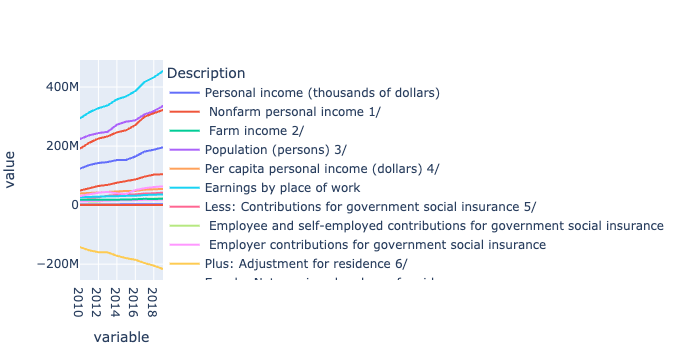

In [409]:
px.line(nyc, y = 'value', x = 'variable', color = 'Description')